# <center> ACM India and RBCDSAI Joint Summer School on DS/AI/ML
## <center> Hands-on Tutorial Day-9
## <center> Introduction to neural networks

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.metrics import confusion_matrix

### Functions

In [ ]:
#Utility function for reading csv file
def read_csv_perceptron(filename):
    df = pd.read_csv(filename)
    X = df.drop('label',axis=1).to_numpy()
    y = df['label'].to_numpy()
    return X,y

#Add ones to the feature vector
def add_bias(X):
    bias = np.ones(len(X)).reshape(-1,1)
    return np.concatenate((bias,X),axis=1)

#Utility function for plotting data
def plot_scatter(X,y):
    plt.scatter(X[:,0][y==0] ,X[:,1][y==0],color = 'red')
    plt.scatter(X[:,0][y==1] ,X[:,1][y==1],color = 'blue')

### Perceptron

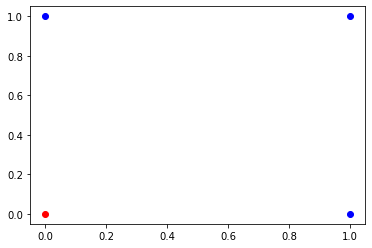

In [ ]:
#And function perceptron
X,y= read_csv_perceptron('and_func.csv')
plot_scatter(X,y)

In [ ]:
X = add_bias(X)
X.shape

(4, 3)

In [ ]:
def predict(w, X_i):
    if np.dot(w,X_i) > 0: return 1
    else: return 0

In [ ]:
def perceptron(X,y):
    #Initialize weights to zero with bias
    w = np.zeros(3).astype(float)
    while True:
        m = 0
        for i in range(len(X)):
            x_i = X[i]
            y_i = y[i]
            pred = predict(w,x_i)
            error = y_i - pred
            w += error*x_i
            if error !=0:
                m+=1
        if m == 0:
            break
    return w

In [ ]:
w = perceptron(X,y)

In [ ]:
#Make predictions
y_pred = []
for i in range(len(X)):
    pred = predict(w,X[i])
    y_pred.append(pred)

In [ ]:
#Calculate accuracy score

In [ ]:
def plot_boundary(w):
  bias = w[0]
  w1 = w[1]
  w2 = w[2]
  m = -(bias / w2) / (bias / w1)
  b = (-bias / w2)
  xx = np.linspace(-5, 20)
  yy = m * xx + 1
  plt.plot(xx, yy, 'k-')

In [ ]:
X_train,y_train = read_csv_perceptron('classification_train_data.csv')
X_test,y_test = read_csv_perceptron('classification_test_data.csv')

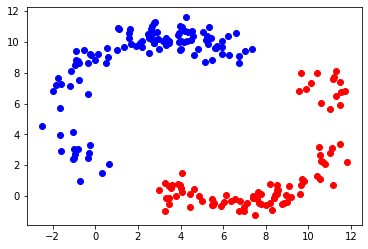

In [ ]:
plot_scatter(X_train,y_train)

In [ ]:
#Plot test dataset

In [ ]:
w = perceptron(add_bias(X_train),y_train)

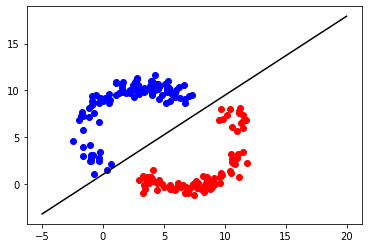

In [ ]:
plot_scatter(X_train,y_train)
plot_boundary(w)

In [ ]:
#Multilayer Perceptron

### Multi-layer perceptron

In [ ]:
class ANN:
    def __init__(self, X, y, hidden_units,learning_rate,epochs):#Give training data, number of neurons,learning rate and epochs
        self.X = X
        self.y = y
        self.hidden_units = hidden_units
        self.input_features = X_train.shape[0]
        self.output_units = y_train.shape[0]
        self.lr = learning_rate
        self.epochs = epochs
        
    def init_weights(self):#Initialize weights from a random normal distribution (Bias only for hidden layer)
        self.W1 = np.random.normal(size = (self.hidden_units,self.input_features))
        self.b1 = np.ones((self.hidden_units,1))
        self.W2 = np.random.normal(size = (self.output_units,self.hidden_units))
    
    def sigmoid(self,X):#sigmoid activation 
        return 1/(1+np.exp(-X))

    def mse_loss(self,y_hat,y):#Calculate mean squared error loss
        errors = (y_hat - y) ** 2
        return np.mean(errors)

    def d_sigmoid(self,X):#Derivative for sigmoid activation
        return self.sigmoid(X)*(1-self.sigmoid(X))
           
    def forward(self,X):#Forward propagation for single layer ANN with sigmoid activation applied only for hidden layer
        self.Z1 = self.W1@X + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = self.W2@self.A1
        return self.Z2

### Analysis using Iris dataset

In [ ]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = df.drop(['Id','Species'],axis=1)
y = df['Species']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74a5990dd0>,
      dtype=object)

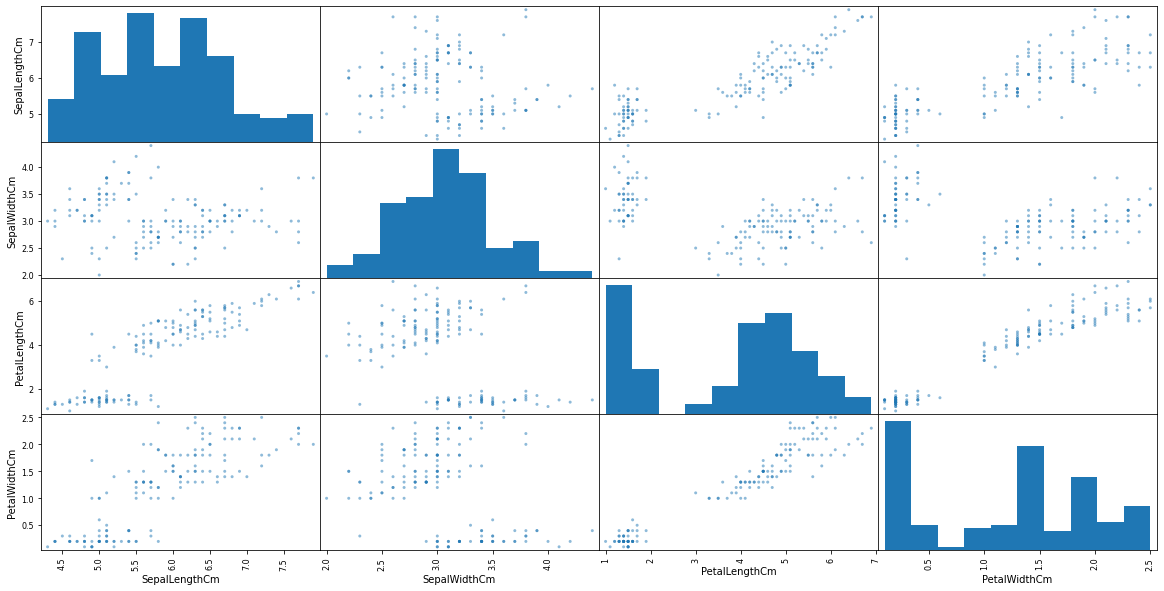

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(X, figsize = (20,10))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=123)

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Assignment Questions:
[Submission URL](https://drive.google.com/drive/folders/19g42t_jNly2R9I3_PMdV9iXTUowkrgvM?usp=sharing)
1. Apply decision tree, random forest, logistic regression and KNN on the iris dataset
2. Calculate accuracy, f1-score, precision, recall, plot ROC curve and compare the metrics with the MLP classifier metrics